In [1]:
# Loading the data 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [2]:
# Splitting and Scaling the data set 

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
# Defining the model using the Sequential API  
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Training the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))






Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0814 - val_loss: 5.7908
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8051 - val_loss: 0.9396
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6545 - val_loss: 0.6290
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6097 - val_loss: 0.5750
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5771 - val_loss: 0.5451
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5513 - val_loss: 0.5197
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5301 - val_loss: 0.5045
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5132 - val_loss: 0.4833
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4992 - val_loss: 0.4809
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4656

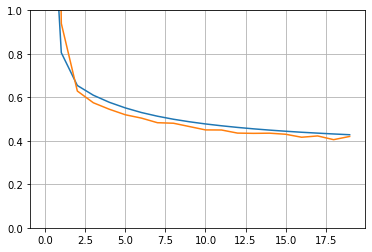

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()



In [8]:
# Evaluating and Predicting 
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

162/162 [==============================] - 0s 893us/step - loss: 0.4253


array([[0.5348476],
       [1.6253275],
       [3.3479068]], dtype=float32)

In [11]:
# Defining the model using the Functional API: this architecture allows the model to learn both deep patterns 
# and simple rules in the data, which may be distorted by the Sequential API

input_ = keras.layers.Input(shape=X_train.shape[1:]) # creating input layer 
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # creating hidden layer 1
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1) # creating hidden layer 2
concat = keras.layers.concatenate([input_, hidden2]) # concatenating input layer and hidden layer 2 
output = keras.layers.Dense(1)(concat) # creating output layer with a single neuron and no activation function
model = keras.models.Model(inputs=[input_], outputs=[output]) # creating a Keras model 
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           930         dense_4[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_5[0][0]                

In [12]:
# Training and Predicting 
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)



Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0698 - val_loss: 0.8177
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7281 - val_loss: 0.6569
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6669 - val_loss: 0.6064
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6232 - val_loss: 0.5736
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5890 - val_loss: 0.5455
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5592 - val_loss: 0.5203
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5353 - val_loss: 0.5065
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5147 - val_loss: 0.4899
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4973 - val_loss: 0.4935
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4830 - val_loss: 0.4575

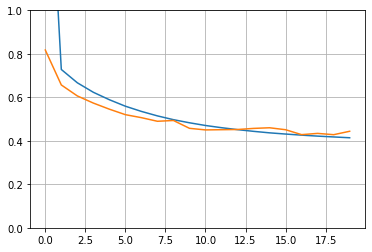

In [13]:
# Plotting training performance
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
# Defining a model using multiple inputs 
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           930         dense_7[0][0]                    
____________________________________________________________________________________________

In [15]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))



Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9800 - val_loss: 1.6962
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7639 - val_loss: 0.7261
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6895 - val_loss: 0.6612
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6467 - val_loss: 0.6179
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6117 - val_loss: 0.5800
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5831 - val_loss: 0.5626
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5593 - val_loss: 0.5443
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5388 - val_loss: 0.5094
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5216 - val_loss: 0.4920
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5071 - val_loss: 0.4825